In [1]:
# 마크다운에 이미지를 넣기 위한 작업
!pip install IPython 
from IPython.display import Image
%matplotlib inline

# Students alcohol consumption
### 전체 데이터
#### (https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-mat.csv)
#### 0: 음주안함, 1: 음주함
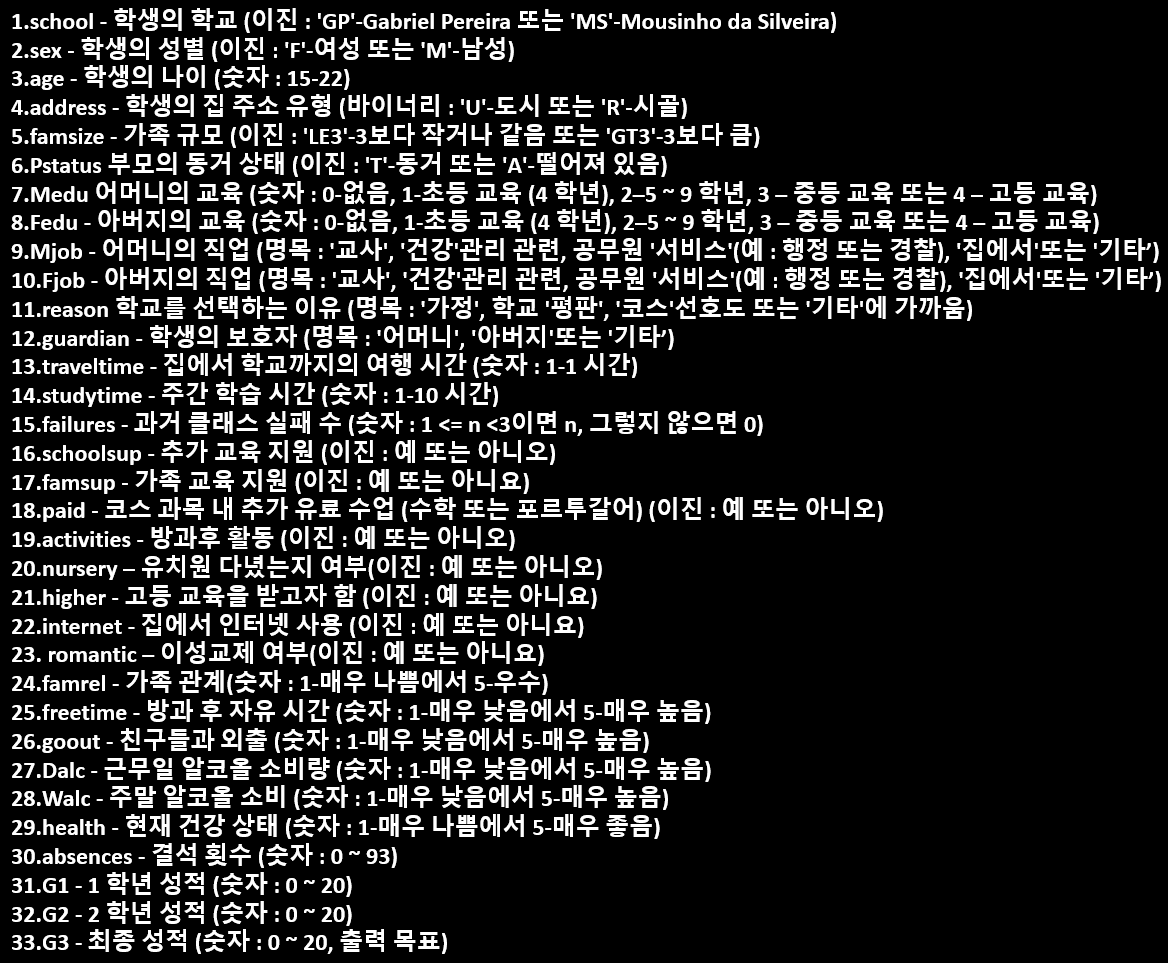

## 데이터 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 로드
df = pd.read_csv('student_alchol.csv')
df.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,U,GT3,T,3,3,other,other,father,...,yes,no,no,4,3,2,1,2,5,0
5,M,16,U,LE3,T,4,3,services,other,mother,...,yes,yes,no,5,4,2,1,2,5,6
6,M,16,U,LE3,T,2,2,other,other,mother,...,yes,yes,no,4,4,4,1,1,3,0
7,F,17,U,GT3,A,4,4,other,teacher,mother,...,yes,no,no,4,1,4,1,1,1,2
8,M,15,U,LE3,A,3,2,services,other,mother,...,yes,yes,no,4,2,2,1,1,1,0
9,M,15,U,GT3,T,3,4,other,other,mother,...,yes,yes,no,5,5,1,1,1,5,0


### 데이터 프레임 확인(결측치 확인)

In [53]:
df.info() #shift + tab을 누르면 함수에 대한 설명이 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   guardian    1044 non-null   object
 10  traveltime  1044 non-null   int64 
 11  studytime   1044 non-null   int64 
 12  failures    1044 non-null   int64 
 13  famsup      1044 non-null   object
 14  paid        1044 non-null   object
 15  activities  1044 non-null   object
 16  higher      1044 non-null   object
 17  internet    1044 non-null   object
 18  romantic    1044 non-null   object
 19  famrel      1044 non-null   int64 
 20  freetime

In [9]:
#데이터 프레임 통계량 요약
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [54]:
#피쳐(feature) 간 상관관계 확인
cor_of_data = df.corr()
cor_of_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867


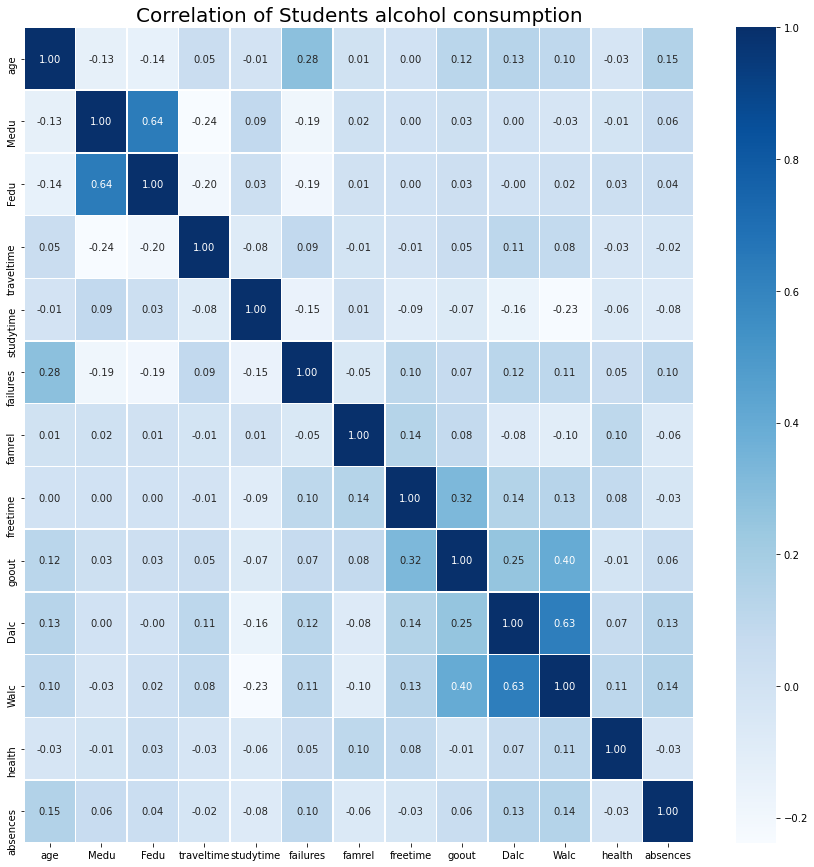

In [126]:
#상관 분석을 통해 구한 ~> 단순 상관관계에 대해서만 설명
plt.figure(figsize=(15,15)) #15x15 사이즈의 표로 그려달라는 의미
sns.heatmap(data = cor_of_data, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation of Students alcohol consumption', fontsize = 20)
plt.show()

In [127]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,U,GT3,T,3,3,other,other,father,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,yes,no,no,5,5,4,4,5,4,11
1040,M,17,U,LE3,T,3,1,services,services,mother,...,yes,yes,no,2,4,5,3,4,2,3
1041,M,21,R,GT3,T,1,1,other,other,other,...,yes,no,no,5,5,3,3,3,3,3
1042,M,18,R,LE3,T,3,2,services,other,mother,...,yes,yes,no,4,4,1,3,4,5,0


In [4]:
df['drink_possibility'] = df['Dalc'] + df['Walc']

In [56]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,no,4,3,4,1,1,3,4,2
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,no,5,3,3,1,1,3,2,2
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,no,4,3,2,2,3,3,6,5
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,3,2,2,1,1,5,0,2
4,F,16,U,GT3,T,3,3,other,other,father,...,no,no,4,3,2,1,2,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,no,no,5,5,4,4,5,4,11,9
1040,M,17,U,LE3,T,3,1,services,services,mother,...,yes,no,2,4,5,3,4,2,3,7
1041,M,21,R,GT3,T,1,1,other,other,other,...,no,no,5,5,3,3,3,3,3,6
1042,M,18,R,LE3,T,3,2,services,other,mother,...,yes,no,4,4,1,3,4,5,0,7


### 데이터 전처리 과정 : 음주 가능성 
#### 주중 + 주말 음주소비 > 2 이면  : 1(음주를 할것이다) , 0(음주를 하지 않을 것이다.)
###### 라벨링 , for문(리스트에 0, 1 쌓기-> 조건문통해)

#### 1. for문 이용

In [6]:
# 1번째 방법 for문 이용하기
drink = []
df['drink_possibility'] = df['Dalc'] + df['Walc']
df['drink_possibility']
dp = []
for i in df['drink_possibility']:
    if(i == 2):
        dp.append(0)
    else:
        dp.append(1)
dp

df['dp'] = dp
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility,dp
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,4,3,4,1,1,3,4,2,0
1,F,17,U,GT3,T,1,1,at_home,other,father,...,no,5,3,3,1,1,3,2,2,0
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,no,4,3,2,2,3,3,6,5,1
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,3,2,2,1,1,5,0,2,0
4,F,16,U,GT3,T,3,3,other,other,father,...,no,4,3,2,1,2,5,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,no,5,5,4,4,5,4,11,9,1
1040,M,17,U,LE3,T,3,1,services,services,mother,...,no,2,4,5,3,4,2,3,7,1
1041,M,21,R,GT3,T,1,1,other,other,other,...,no,5,5,3,3,3,3,3,6,1
1042,M,18,R,LE3,T,3,2,services,other,mother,...,no,4,4,1,3,4,5,0,7,1


#### 2. 라벨링 이용

In [139]:
# 2번째 방법 라벨링하기
df['drink_possibility'].unique()

array([ 2,  5,  3,  4,  6, 10,  7,  8,  9], dtype=int64)

In [5]:
# 라벨링 하기
mapping = {2 : 0, 3 : 1, 4 : 1, 5 : 1, 6 : 1, 7 : 1, 8 : 1, 9 : 1, 10 : 1}

In [6]:
#map함수를 통해 라벨링 하기
df['drink_possibility'] = df['drink_possibility'].map(mapping)

In [61]:
#변경된 값 확인하기
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,no,4,3,4,1,1,3,4,0
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,no,5,3,3,1,1,3,2,0
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,no,4,3,2,2,3,3,6,1
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,3,2,2,1,1,5,0,0
4,F,16,U,GT3,T,3,3,other,other,father,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,no,no,5,5,4,4,5,4,11,1
1040,M,17,U,LE3,T,3,1,services,services,mother,...,yes,no,2,4,5,3,4,2,3,1
1041,M,21,R,GT3,T,1,1,other,other,other,...,no,no,5,5,3,3,3,3,3,1
1042,M,18,R,LE3,T,3,2,services,other,mother,...,yes,no,4,4,1,3,4,5,0,1


In [62]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,0.113192
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,-0.026493
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.003026
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,0.033793
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,-0.200787
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,0.043357
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,-0.104139
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,0.054993
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,0.269789
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,0.419692


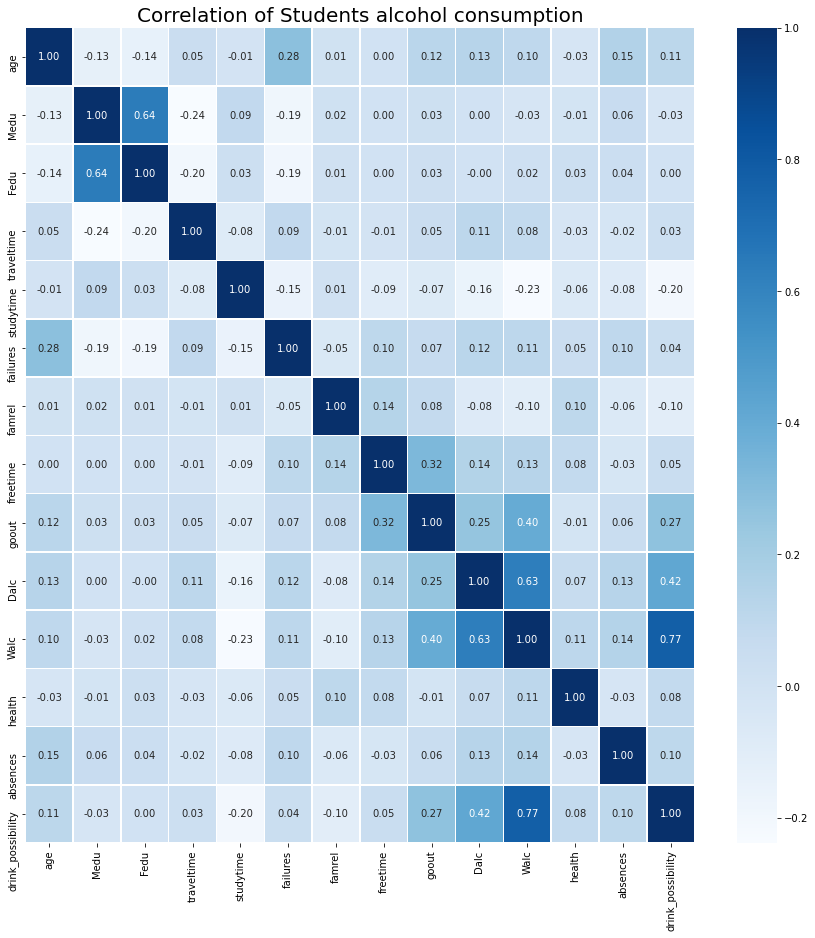

In [63]:
#상관 분석을 통해 구한 ~> 단순 상관관계에 대해서만 설명
#삭제 예정
plt.figure(figsize=(15,15)) #15x15 사이즈의 표로 그려달라는 의미
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation of Students alcohol consumption', fontsize = 20)
plt.show()

### 성별에 따른 음주 가능성
#### 인사이트
#### 남학생의 경우 전체 72%, 여학생의 경우 전체 55% 정도 음주가능성이 있다.


In [154]:
#남학생의 음주 가능성
m_drink = df[df['sex'] == 'M']['drink_possibility'].mean()
m_drink

0.7240618101545254

In [155]:
#여학생의 음주 가능성
f_drink = df[df['sex'] == 'F']['drink_possibility'].mean()
f_drink

0.5499153976311336

In [222]:
#성별로 그룹화 하여 음주 가능성의 평균
sex_dp = sex_age_dp.groupby('sex')['drink_possibility'].mean()
sex_dp

sex
F    0.549915
M    0.724062
Name: drink_possibility, dtype: float64

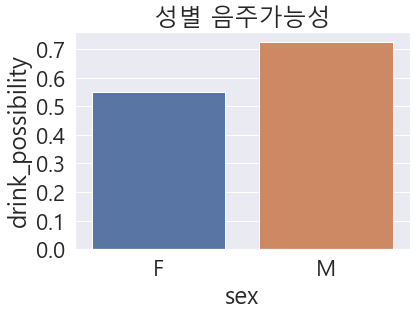

In [241]:
#한글로 사용하기 위한 설정(한글처리)
from matplotlib import font_manager , rc
f_path = 'C:/Windows/Fonts/malgun.ttf' #폰트 경로
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)
sex_dp_df = sex_dp.to_frame()
sex_dp_df #sex가 인덱스이고 피쳐가 drink_possibility
sex_dp_df.reset_index() #인덱스 초기화

plt.title("성별 음주가능성")
sns.barplot(data = sex_dp_df.reset_index(), x = "sex", y = "drink_possibility")
sns.set(font_scale = 1) #폰트 크기 조절

### 나이대 별 음주 가능성
#### 인사이트
#### 20대 중에서는 22살 10대 중에서는 17살의 음주 가능성이 높다

In [202]:
#나이대 별 음주 가능성(1인애들로)
sex_age_dp = df[['sex','age','drink_possibility']]
sex_age_dp

,sex,age,drink_possibility
0,F,18,0
1,F,17,0
2,F,15,1
3,F,15,0
4,F,16,1
...,...,...,...
1039,M,20,1
1040,M,17,1
1041,M,21,1
1042,M,18,1


In [211]:
#sex_age_dp.groupby('age')['drink_possibility'].value_counts() # 술을 마시고 안마시고 
sex_age_dp_mean = sex_age_dp.groupby('age')['drink_possibility'].mean()
sex_age_dp_mean

age
15    0.474227
16    0.612100
17    0.718412
18    0.662162
19    0.607143
20    0.555556
21    0.666667
22    1.000000
Name: drink_possibility, dtype: float64

In [245]:
sex_age_dp_mean_df = sex_age_dp_mean.to_frame()
sex_age_dp_mean_df.reset_index()

,age,drink_possibility
0,15,0.474227
1,16,0.612100
2,17,0.718412
3,18,0.662162
4,19,0.607143
5,20,0.555556
6,21,0.666667
7,22,1.000000


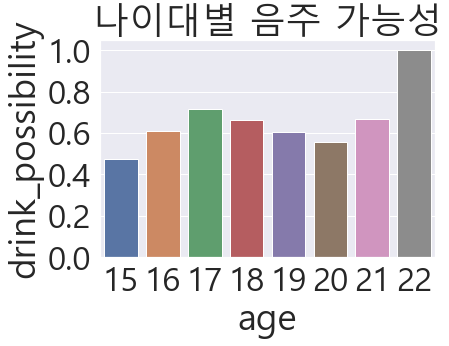

In [257]:
#한글로 사용하기 위한 설정(한글처리)
rc('font', family = font_name)

sns.barplot(data = sex_age_dp_mean_df.reset_index(), x = "age", y = "drink_possibility")
plt.title("나이대별 음주 가능성")
sns.set(font_scale = 1)

In [14]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,no,4,3,4,1,1,3,4,0
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,no,5,3,3,1,1,3,2,0
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,no,4,3,2,2,3,3,6,1
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,3,2,2,1,1,5,0,0
4,F,16,U,GT3,T,3,3,other,other,father,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,no,no,5,5,4,4,5,4,11,1
1040,M,17,U,LE3,T,3,1,services,services,mother,...,yes,no,2,4,5,3,4,2,3,1
1041,M,21,R,GT3,T,1,1,other,other,other,...,no,no,5,5,3,3,3,3,3,1
1042,M,18,R,LE3,T,3,2,services,other,mother,...,yes,no,4,4,1,3,4,5,0,1


### 가족 관계에 따른 음주 가능성
#### 인사이트
#### 가족관계가 좋을 수록 음주 가능성은 낮아진다

In [16]:
fd = df[['famrel', 'drink_possibility']]
fd

,famrel,drink_possibility
0,4,0
1,5,0
2,4,1
3,3,0
4,4,1
...,...,...
1039,5,1
1040,2,1
1041,5,1
1042,4,1


In [22]:
fd_mean = fd.groupby('famrel').mean()
fd_mean

,drink_possibility
famrel,
1,0.733333
2,0.680851
3,0.715976
4,0.621094
5,0.559441


<AxesSubplot:xlabel='famrel', ylabel='drink_possibility'>

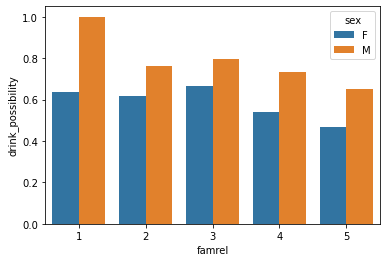

In [27]:
sns.barplot(data = df , x = 'famrel', y = 'drink_possibility', hue = 'sex', ci = None)

### 부모의 교육 수준에 따른 자녀의 음주 가능성
#### 인사이트
#### 부모의 교육 수준을 통해 음주 가능성을 체크하는 건 불가

In [8]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,drink_possibility
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,no,4,3,4,1,1,3,4,0
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,no,5,3,3,1,1,3,2,0
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,no,4,3,2,2,3,3,6,1
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,3,2,2,1,1,5,0,0
4,F,16,U,GT3,T,3,3,other,other,father,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,U,LE3,A,2,2,services,services,other,...,no,no,5,5,4,4,5,4,11,1
1040,M,17,U,LE3,T,3,1,services,services,mother,...,yes,no,2,4,5,3,4,2,3,1
1041,M,21,R,GT3,T,1,1,other,other,other,...,no,no,5,5,3,3,3,3,3,1
1042,M,18,R,LE3,T,3,2,services,other,mother,...,yes,no,4,4,1,3,4,5,0,1


In [21]:
Md = df[['Medu','drink_possibility']].groupby('Medu').mean()
Md

,drink_possibility
Medu,
0,0.666667
1,0.688119
2,0.574394
3,0.647059
4,0.614379


In [20]:
Fd = df[['Fedu','drink_possibility']].groupby('Fedu').mean()
Fd

,drink_possibility
Fedu,
0,0.000000
1,0.671875
2,0.604938
3,0.619048
4,0.633929


array([<AxesSubplot:ylabel='drink_possibility'>], dtype=object)

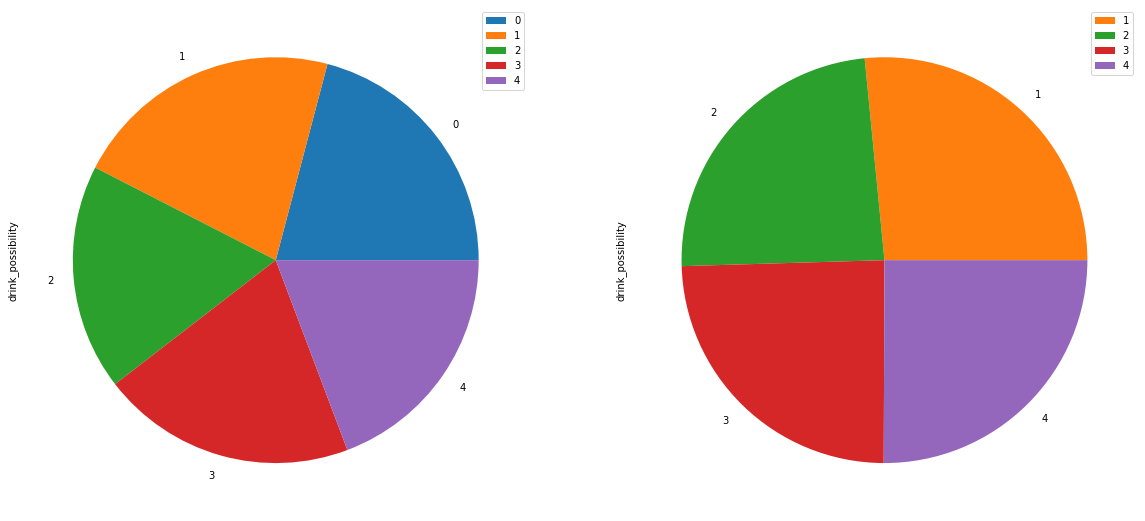

In [36]:
f, ax = plt.subplots(1,2, figsize = [20, 20])
Md.plot.pie(subplots=True, ax = ax[0])
Fd.plot.pie(subplots=True, ax = ax[1])

In [ ]:
#인과 관계를 증명할 때 : 회귀(머신러닝을 통해)